In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.3.4/spark-2.3.4-bin-hadoop2.7.tgz
!tar xf spark-2.3.4-bin-hadoop2.7.tgz

!wget -q https://www-us.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

In [ ]:
!pip install pyspark

     |████████████████████████████████| 215.7MB 85kB/s 
     |████████████████████████████████| 204kB 36.4MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.4-py2.py3-none-any.whl size=216130387 sha256=24750253414f21c463893fb329484763ff87f0be5ecf7e75ba89f6be36ea5cf0
  Stored in directory: /root/.cache/pip/wheels/ab/09/4d/0d184230058e654eb1b04467dbc1292f00eaa186544604b471
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
spark = SparkSession.builder.master("local").getOrCreate()
sc = SparkContext.getOrCreate()

# 1. Lectura de datos

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/PySpark Machine Learning en plataforma Big Data/Training R ML en Casos de Negocios/4_Caso negocio renovacion Prestamo/0.DS_Renovacion_prestamo.csv'

'/content/drive/My Drive/PySpark Machine Learning en plataforma Big Data/Training R ML en Casos de Negocios/4_Caso negocio renovacion Prestamo/0.DS_Renovacion_prestamo.csv'


In [ ]:
ls -la

total 446520
drwxr-xr-x  1 root   root      4096 Oct 20 16:55 ./
drwxr-xr-x  1 root   root      4096 Oct 20 16:41 ../
drwxr-xr-x  1 root   root      4096 Oct 17 16:14 .config/
drwx------  3 root   root      4096 Oct 20 16:55 drive/
drwxr-xr-x  1 root   root      4096 Aug 27 16:17 sample_data/
drwxr-xr-x 13 155454 1000      4096 Aug 26 08:28 spark-2.3.4-bin-hadoop2.7/
-rw-r--r--  1 root   root 227110658 Sep 21 14:42 spark-2.3.4-bin-hadoop2.7.tgz
drwxr-xr-x 13   1000 1000      4096 Aug 27 21:30 spark-2.4.4-bin-hadoop2.7/
-rw-r--r--  1 root   root 230091034 Sep 21 14:43 spark-2.4.4-bin-hadoop2.7.tgz


In [ ]:
pwd

'/content'

In [ ]:
!free -h


              total        used        free      shared  buff/cache   available
Mem:            12G        858M        5.6G        848K        6.3G         11G
Swap:            0B          0B          0B


In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          49G   27G   20G  58% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G  8.0K  6.4G   1% /var/colab
/dev/sda1        55G   29G   27G  52% /etc/hosts
shm             6.0G  4.0K  6.0G   1% /dev/shm
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  9.5G  5.6G  63% /content/drive


# 2. Carga de datos en formato spark

In [ ]:
! ls /content/drive/My\ Drive | grep -i py

2015_9.ipynb
Copia de ModelosPronostico-SeriesdeTiempo.ipynb
Copy of muestra.xlsx
ficha_PYTHON.gsheet
ficha_PYTHON.xlsx
lamp_45139145.py
Machine Learning with PySpark_ With Natural Language Processing and Recommender Systems ( PDFDrive.com ).pdf
ModelosPronostico-SeriesdeTiempo.ipynb
perforacion_45139145 (1).py
perforacion_45139145.py
PySpark Machine Learning en plataforma Big Data
PYTHON-DJANGO
the-hacker-guide-to-python-sample.pdf


In [ ]:
renov_prestamo = spark.read.csv(
    '/content/drive/My Drive/PySpark Machine Learning en plataforma Big Data/Training R ML en Casos de Negocios/4_Caso negocio renovacion Prestamo/0.DS_Renovacion_prestamo.csv', 
    sep=';', 
    header=True, 
    inferSchema=True
)

# 2.1 Revision de formatos 
renov_prestamo.printSchema()

root
 |-- MES: integer (nullable = true)
 |-- CLIENTE: integer (nullable = true)
 |-- LINEA_RENOVADO: integer (nullable = true)
 |-- PLAZO_RENOVADO: integer (nullable = true)
 |-- FLAG_VENTA: integer (nullable = true)
 |-- USO_LINEA_TOTAL_TC_T2: double (nullable = true)
 |-- USO_TRIM_LINEA_BBVA: double (nullable = true)
 |-- NR_ENTIDADES_TOTAL_T2: integer (nullable = true)
 |-- DIFF_NRO_ENTIDA_TOTALES_T2_T12: integer (nullable = true)
 |-- SDO_CONSUMO_T2: double (nullable = true)
 |-- RESENCIA_OFERTA_PLD_RENOVADO: integer (nullable = true)
 |-- Ahorro_Sldo_Bco_T1: integer (nullable = true)
 |-- PConsumo_Sldo_Bco_T1: integer (nullable = true)
 |-- SDO_BCO_tot_sm_pasivo_Bco_6M: double (nullable = true)
 |-- EDAD: integer (nullable = true)
 |-- SEXO: string (nullable = true)
 |-- EST_CIVIL: string (nullable = true)
 |-- ANTIGUEDAD_MES: integer (nullable = true)
 |-- REGION: string (nullable = true)
 |-- FLAG_LIMA_PROVINCIA: integer (nullable = true)
 |-- SUELDO_ESTIMADO: double (nullable 

In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          49G   27G   20G  58% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G  8.0K  6.4G   1% /var/colab
/dev/sda1        55G   29G   27G  52% /etc/hosts
shm             6.0G  4.0K  6.0G   1% /dev/shm
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  9.5G  5.6G  63% /content/drive


In [ ]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        1.2G        5.1G        848K        6.4G         11G
Swap:            0B          0B          0B


In [ ]:
renov_prestamo.describe().show()

+-------+------------------+------------------+------------------+------------------+-------------------+---------------------+-------------------+---------------------+------------------------------+------------------+----------------------------+------------------+--------------------+----------------------------+------------------+-----+---------+------------------+------+-------------------+------------------+----------------------------------+
|summary|               MES|           CLIENTE|    LINEA_RENOVADO|    PLAZO_RENOVADO|         FLAG_VENTA|USO_LINEA_TOTAL_TC_T2|USO_TRIM_LINEA_BBVA|NR_ENTIDADES_TOTAL_T2|DIFF_NRO_ENTIDA_TOTALES_T2_T12|    SDO_CONSUMO_T2|RESENCIA_OFERTA_PLD_RENOVADO|Ahorro_Sldo_Bco_T1|PConsumo_Sldo_Bco_T1|SDO_BCO_tot_sm_pasivo_Bco_6M|              EDAD| SEXO|EST_CIVIL|    ANTIGUEDAD_MES|REGION|FLAG_LIMA_PROVINCIA|   SUELDO_ESTIMADO|CUBRIR_DEUDA_CONSUMO_SF_RENOVA_PLD|
+-------+------------------+------------------+------------------+------------------+---------

In [ ]:
renov_prestamo.dtypes

[('MES', 'int'),
 ('CLIENTE', 'int'),
 ('LINEA_RENOVADO', 'int'),
 ('PLAZO_RENOVADO', 'int'),
 ('FLAG_VENTA', 'int'),
 ('USO_LINEA_TOTAL_TC_T2', 'double'),
 ('USO_TRIM_LINEA_BBVA', 'double'),
 ('NR_ENTIDADES_TOTAL_T2', 'int'),
 ('DIFF_NRO_ENTIDA_TOTALES_T2_T12', 'int'),
 ('SDO_CONSUMO_T2', 'double'),
 ('RESENCIA_OFERTA_PLD_RENOVADO', 'int'),
 ('Ahorro_Sldo_Bco_T1', 'int'),
 ('PConsumo_Sldo_Bco_T1', 'int'),
 ('SDO_BCO_tot_sm_pasivo_Bco_6M', 'double'),
 ('EDAD', 'int'),
 ('SEXO', 'string'),
 ('EST_CIVIL', 'string'),
 ('ANTIGUEDAD_MES', 'int'),
 ('REGION', 'string'),
 ('FLAG_LIMA_PROVINCIA', 'int'),
 ('SUELDO_ESTIMADO', 'double'),
 ('CUBRIR_DEUDA_CONSUMO_SF_RENOVA_PLD', 'double')]

# 2.1 Exploracion del DataDrame


## 2.1.1 Exploracion - Columnas y dimension de Dataframe

In [ ]:
# Nombres de columnas
renov_prestamo.columns

['MES',
 'CLIENTE',
 'LINEA_RENOVADO',
 'PLAZO_RENOVADO',
 'FLAG_VENTA',
 'USO_LINEA_TOTAL_TC_T2',
 'USO_TRIM_LINEA_BBVA',
 'NR_ENTIDADES_TOTAL_T2',
 'DIFF_NRO_ENTIDA_TOTALES_T2_T12',
 'SDO_CONSUMO_T2',
 'RESENCIA_OFERTA_PLD_RENOVADO',
 'Ahorro_Sldo_Bco_T1',
 'PConsumo_Sldo_Bco_T1',
 'SDO_BCO_tot_sm_pasivo_Bco_6M',
 'EDAD',
 'SEXO',
 'EST_CIVIL',
 'ANTIGUEDAD_MES',
 'REGION',
 'FLAG_LIMA_PROVINCIA',
 'SUELDO_ESTIMADO',
 'CUBRIR_DEUDA_CONSUMO_SF_RENOVA_PLD']

In [ ]:
# Dimensionamiento del Dataframe
print(renov_prestamo.count(), len(renov_prestamo.columns))

87556 22


## 2.1.2 Operaciones con el Dataframe 

In [ ]:
# Agregando columna en formato de anios
renov_prestamo = renov_prestamo.withColumn(
    "SUELDO_ESTIMADO_12",
    (renov_prestamo["SUELDO_ESTIMADO"] / 12)
)
renov_prestamo.select('SUELDO_ESTIMADO', 'SUELDO_ESTIMADO_12').show(5, False)

+---------------+------------------+
|SUELDO_ESTIMADO|SUELDO_ESTIMADO_12|
+---------------+------------------+
|3531.0         |294.25            |
|1322.0         |110.16666666666667|
|4234.0         |352.8333333333333 |
|6647.0         |553.9166666666666 |
|2094.0         |174.5             |
+---------------+------------------+
only showing top 5 rows



In [ ]:
renov_prestamo.groupBy('EST_CIVIL').count().show()

+---------+-----+
|EST_CIVIL|count|
+---------+-----+
|     null|    1|
|        Y|    8|
|        U| 2749|
|        V|  788|
|        D| 2037|
|        C|37631|
|        X|    1|
|        S|44341|
+---------+-----+



In [ ]:
# Agrupamiento por Departamento de residencia
renov_prestamo.groupBy('EST_CIVIL').count().show(15)

+---------+-----+
|EST_CIVIL|count|
+---------+-----+
|     null|    1|
|        Y|    8|
|        U| 2749|
|        V|  788|
|        D| 2037|
|        C|37631|
|        X|    1|
|        S|44341|
+---------+-----+



In [ ]:
# Agrupamiento por Departamento de residencia
renov_prestamo.groupBy('EST_CIVIL').mean('SUELDO_ESTIMADO').show(10)

+---------+--------------------+
|EST_CIVIL|avg(SUELDO_ESTIMADO)|
+---------+--------------------+
|     null|               800.0|
|        Y|            2573.625|
|        U|  3524.5773008366677|
|        V|   4538.017347715738|
|        D|   6542.628362831857|
|        C|   5422.554809764266|
|        X|              4457.0|
|        S|   4209.059866082911|
+---------+--------------------+



In [ ]:
renov_prestamo.groupBy('EST_CIVIL').max('SUELDO_ESTIMADO').show(10)

+---------+--------------------+
|EST_CIVIL|max(SUELDO_ESTIMADO)|
+---------+--------------------+
|     null|               800.0|
|        Y|              2869.0|
|        U|             42857.0|
|        V|             30000.0|
|        D|             83153.0|
|        C|            240909.0|
|        X|              4457.0|
|        S|             80326.0|
+---------+--------------------+



In [ ]:
renov_prestamo.groupBy('EST_CIVIL').min('SUELDO_ESTIMADO').show(10)

+---------+--------------------+
|EST_CIVIL|min(SUELDO_ESTIMADO)|
+---------+--------------------+
|     null|               800.0|
|        Y|               676.0|
|        U|                75.0|
|        V|                69.0|
|        D|                 0.0|
|        C|                 0.0|
|        X|              4457.0|
|        S|                 0.0|
+---------+--------------------+



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b0e0bc2b0>]],
      dtype=object)

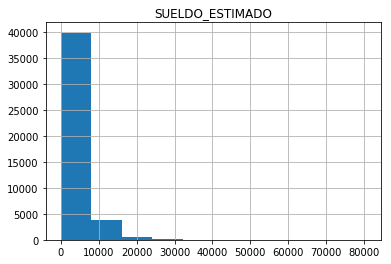

In [ ]:
renov_prestamo[renov_prestamo['EST_CIVIL'] == 'S'].select('SUELDO_ESTIMADO').toPandas().hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b0e01a160>]],
      dtype=object)

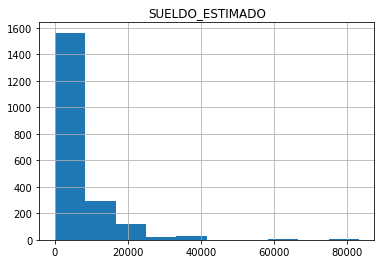

In [ ]:
renov_prestamo[renov_prestamo['EST_CIVIL'] == 'D'].select('SUELDO_ESTIMADO').toPandas().hist()

PODEMOS NOTAR CON EL HISTOGRAMA QUE LA CANTIDAD DE PERSONAS QUE GANAN MAS DE 4000 SOLES ES MAYOR EN LOS DIVORCIADOS QUE EN LOS JOVENES.

DE TODAS FORMAS SE MUESTRA UNA GRAN CANTIDAD DE VALORES EXTREMOS, POR LO QUE SE PUEDE RECURRIR A LA MEDIANA EN VEZ DE LA MEDIA

In [ ]:
from pyspark.sql.types import *
import pyspark.sql.functions as F
import numpy as np

def find_median(values):
    try:
        median = np.median(values) 
        return round(float(median),2)
    except Exception:
        return None

median_finder = F.udf(find_median, FloatType())

df2 = renov_prestamo.groupBy("EST_CIVIL").agg(
    F.collect_list("SUELDO_ESTIMADO").alias("SUELDOs_ESTIMADOs")
)
df2 = df2.withColumn("median_SUELDO_ESTIMADO", median_finder("SUELDOs_ESTIMADOs"))
df2.show()

+---------+--------------------+----------------------+
|EST_CIVIL|   SUELDOs_ESTIMADOs|median_SUELDO_ESTIMADO|
+---------+--------------------+----------------------+
|     null|             [800.0]|                 800.0|
|        Y|[2869.0, 2869.0, ...|                2869.0|
|        U|[3103.0, 1689.0, ...|                2671.0|
|        V|[5260.0, 181.0, 5...|                3247.5|
|        D|[5866.0, 5375.0, ...|                3985.0|
|        C|[2094.0, 2676.0, ...|                3466.0|
|        X|            [4457.0]|                4457.0|
|        S|[3531.0, 1322.0, ...|                3042.0|
+---------+--------------------+----------------------+



DE ESTA MANERA PODEMOS TENER COMPARACIONES MAS REPRESENTATIVAS

In [ ]:
renov_prestamo.describe().show()

+-------+------------------+------------------+------------------+------------------+-------------------+---------------------+-------------------+---------------------+------------------------------+------------------+----------------------------+------------------+--------------------+----------------------------+------------------+-----+---------+------------------+------+-------------------+------------------+----------------------------------+------------------+
|summary|               MES|           CLIENTE|    LINEA_RENOVADO|    PLAZO_RENOVADO|         FLAG_VENTA|USO_LINEA_TOTAL_TC_T2|USO_TRIM_LINEA_BBVA|NR_ENTIDADES_TOTAL_T2|DIFF_NRO_ENTIDA_TOTALES_T2_T12|    SDO_CONSUMO_T2|RESENCIA_OFERTA_PLD_RENOVADO|Ahorro_Sldo_Bco_T1|PConsumo_Sldo_Bco_T1|SDO_BCO_tot_sm_pasivo_Bco_6M|              EDAD| SEXO|EST_CIVIL|    ANTIGUEDAD_MES|REGION|FLAG_LIMA_PROVINCIA|   SUELDO_ESTIMADO|CUBRIR_DEUDA_CONSUMO_SF_RENOVA_PLD|SUELDO_ESTIMADO_12|
+-------+------------------+------------------+---------

In [ ]:
print(dir(renov_prestamo.groupBy('EST_CIVIL')))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_df', '_jgd', 'agg', 'apply', 'avg', 'count', 'max', 'mean', 'min', 'pivot', 'sql_ctx', 'sum']


In [ ]:
print(renov_prestamo.columns)

['MES', 'CLIENTE', 'LINEA_RENOVADO', 'PLAZO_RENOVADO', 'FLAG_VENTA', 'USO_LINEA_TOTAL_TC_T2', 'USO_TRIM_LINEA_BBVA', 'NR_ENTIDADES_TOTAL_T2', 'DIFF_NRO_ENTIDA_TOTALES_T2_T12', 'SDO_CONSUMO_T2', 'RESENCIA_OFERTA_PLD_RENOVADO', 'Ahorro_Sldo_Bco_T1', 'PConsumo_Sldo_Bco_T1', 'SDO_BCO_tot_sm_pasivo_Bco_6M', 'EDAD', 'SEXO', 'EST_CIVIL', 'ANTIGUEDAD_MES', 'REGION', 'FLAG_LIMA_PROVINCIA', 'SUELDO_ESTIMADO', 'CUBRIR_DEUDA_CONSUMO_SF_RENOVA_PLD', 'SUELDO_ESTIMADO_12']


In [ ]:
# Filtrado de Dataframe
renov_prestamo.filter(renov_prestamo['EST_CIVIL']=='D').groupBy('REGION').count().show()

+--------------+-----+
|        REGION|count|
+--------------+-----+
|SIERRA CENTRAL|   87|
|        CALLAO|   88|
|         NORTE|  209|
|       ORIENTE|   74|
|    LIMA NORTE|  160|
|           SUR|  101|
|LIMA PROVINCIA|   26|
|   LIMA CENTRO|  222|
|LIMA BALNEARIO|    9|
|         OESTE|   30|
|        CENTRO|  127|
|  LIMA MODERNA|  672|
|     LIMA ESTE|  120|
|      LIMA SUR|  112|
+--------------+-----+



In [ ]:
df2 = renov_prestamo.groupBy('REGION', 'EST_CIVIL').agg(
    F.collect_list("SUELDO_ESTIMADO").alias("SUELDOs_ESTIMADOs")
)
df2 = df2.withColumn("median_SUELDO_ESTIMADO", median_finder("SUELDOs_ESTIMADOs"))

df2.sort(F.desc('median_SUELDO_ESTIMADO')).show()

+--------------+---------+--------------------+----------------------+
|        REGION|EST_CIVIL|   SUELDOs_ESTIMADOs|median_SUELDO_ESTIMADO|
+--------------+---------+--------------------+----------------------+
|LIMA BALNEARIO|        D|[9993.0, 9993.0, ...|                9993.0|
|  LIMA MODERNA|        D|[5866.0, 4319.0, ...|                7514.0|
|  LIMA MODERNA|        C|[16343.0, 7861.0,...|                6921.0|
|  LIMA MODERNA|        U|[6200.0, 4910.99,...|                6200.0|
|   LIMA CENTRO|        V|[2623.76, 8199.0,...|                5310.0|
|        CALLAO|        D|[3000.0, 6409.0, ...|                4990.0|
|SIERRA CENTRAL|        U|[3500.0, 5966.0, ...|                4837.0|
|  LIMA MODERNA|        S|[4234.0, 2140.25,...|                4786.0|
|        CALLAO|        V|[5443.0, 5064.0, ...|                4664.0|
|     LIMA ESTE|        D|[4646.0, 2375.71,...|                4646.0|
|      LIMA SUR|        X|            [4457.0]|                4457.0|
|  LIM

In [ ]:
df2 = renov_prestamo.groupBy('FLAG_VENTA', 'REGION', 'EST_CIVIL').agg(
    F.collect_list("SUELDO_ESTIMADO").alias("SUELDOs_ESTIMADOs")
)
df2 = df2.withColumn("median_SUELDO_ESTIMADO", median_finder("SUELDOs_ESTIMADOs"))

df2.sort(F.desc('median_SUELDO_ESTIMADO')).show()

+----------+--------------+---------+--------------------+----------------------+
|FLAG_VENTA|        REGION|EST_CIVIL|   SUELDOs_ESTIMADOs|median_SUELDO_ESTIMADO|
+----------+--------------+---------+--------------------+----------------------+
|         0|LIMA BALNEARIO|        D|[9993.0, 9993.0, ...|                9993.0|
|         0|  LIMA MODERNA|        D|[4713.0, 9303.0, ...|                7514.0|
|         1|      LIMA SUR|        D|[2190.0, 2824.0, ...|                7039.5|
|         0|  LIMA MODERNA|        C|[11567.0, 926.0, ...|                6940.0|
|         0|  LIMA MODERNA|        U|[7552.93, 1900.17...|                6200.0|
|         1|  LIMA MODERNA|        U|[14119.0, 4369.0,...|               5555.49|
|         1|SIERRA CENTRAL|        D|[33654.0, 1088.0,...|                5361.7|
|         0|   LIMA CENTRO|        V|[17357.0, 5310.0,...|                5310.0|
|         1|           SUR|        V|[6047.0, 246.0, 5...|                5309.0|
|         1|  LI

In [ ]:
!pip install scorecardpy

     |████████████████████████████████| 61kB 2.4MB/s 
  Created wheel for scorecardpy: filename=scorecardpy-0.1.8-cp36-none-any.whl size=57599 sha256=46cfc9a2b03b733ed16a4776e4d40a98f843b354627a15569eaf58a834e94d54
  Stored in directory: /root/.cache/pip/wheels/94/22/09/3e32b2a727ae2bbd6933a8a586e9f93e5144e8c356cb8806f1
Successfully built scorecardpy


In [ ]:
import scorecardpy as sc
import pandas as pd

In [ ]:
type(renov_prestamo)

pyspark.sql.dataframe.DataFrame

In [ ]:
df = renov_prestamo.toPandas()


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# Formato de variables ScorecardPy
dt_s = sc.var_filter(df, y="FLAG_VENTA")


[INFO] filtering variables ...
Variable filtering on 87556 rows and 23 columns in 00:09:58 
6 variables are removed


In [ ]:
sc.iv(df, y="FLAG_VENTA")

In [ ]:
bins = sc.woebin(dt_s, y="FLAG_VENTA")

[INFO] creating woe binning ...


/usr/local/lib/python3.6/dist-packages/scorecardpy/woebin.py:711: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  binning = pd.concat(bin_list, keys=bin_list.keys()).reset_index()\
/usr/local/lib/python3.6/dist-packages/scorecardpy/woebin.py:711: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  binning = pd.concat(bin_list, keys=bin_list.keys()).reset_index()\
/usr/local/lib/python3.6/dist-packages/scorecardpy/woebin.py:711: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept 

Binning on 45798 rows and 17 columns in 00:00:20


In [ ]:
bins

{'ANTIGUEDAD_ANIOS':            variable         bin  count  ...  total_iv  breaks  is_special_values
 0  ANTIGUEDAD_ANIOS  [-inf,2.0)  11326  ...  0.045909     2.0              False
 1  ANTIGUEDAD_ANIOS   [2.0,8.0)  17331  ...  0.045909     8.0              False
 2  ANTIGUEDAD_ANIOS  [8.0,17.0)  11656  ...  0.045909    17.0              False
 3  ANTIGUEDAD_ANIOS  [17.0,inf)   5485  ...  0.045909     inf              False
 
 [4 rows x 12 columns],
 'ANTIGUEDAD_MES':          variable           bin  count  ...  total_iv  breaks  is_special_values
 0  ANTIGUEDAD_MES   [-inf,20.0)   9877  ...   0.04779    20.0              False
 1  ANTIGUEDAD_MES   [20.0,90.0)  17824  ...   0.04779    90.0              False
 2  ANTIGUEDAD_MES  [90.0,200.0)  12126  ...   0.04779   200.0              False
 3  ANTIGUEDAD_MES   [200.0,inf)   5971  ...   0.04779     inf              False
 
 [4 rows x 12 columns],
 'Ahorro_Sldo_Bco_T1':              variable             bin  ...   breaks  is_special_val

{'ANTIGUEDAD_ANIOS': <Figure size 432x288 with 2 Axes>,
 'ANTIGUEDAD_MES': <Figure size 432x288 with 2 Axes>,
 'Ahorro_Sldo_Bco_T1': <Figure size 432x288 with 2 Axes>,
 'DEPARTAMENTO': <Figure size 432x288 with 2 Axes>,
 'LINEA_BCO_T2': <Figure size 432x288 with 2 Axes>,
 'MAX_MTO_OPERA_Anual': <Figure size 432x288 with 2 Axes>,
 'NUM_TC_TOTAL_T2': <Figure size 432x288 with 2 Axes>,
 'Nro_CTa_Ahorro_Bco_T1': <Figure size 432x288 with 2 Axes>,
 'PROM_ANUAL_MTO_OPERA': <Figure size 432x288 with 2 Axes>,
 'Ratio_HospvsMtoTotal_t2': <Figure size 432x288 with 2 Axes>,
 'SALDO_BCO_T2': <Figure size 432x288 with 2 Axes>,
 'SEXO': <Figure size 432x288 with 2 Axes>,
 'SOW_BCO_SEMESTRAL': <Figure size 432x288 with 2 Axes>,
 'SOW_BCO_T2': <Figure size 432x288 with 2 Axes>,
 'USO_LINEA_BCO_T2': <Figure size 432x288 with 2 Axes>,
 'monto_ope_t2': <Figure size 432x288 with 2 Axes>}

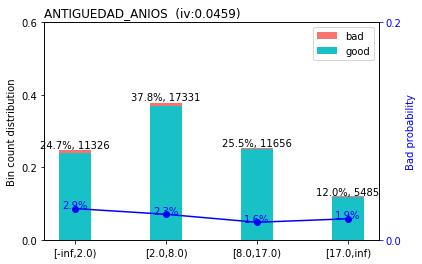

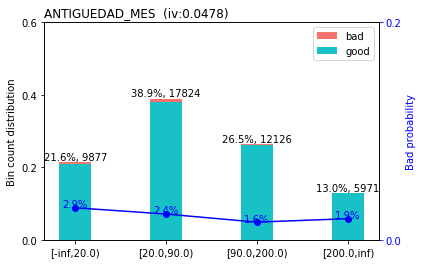

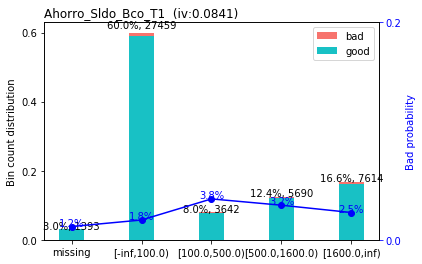

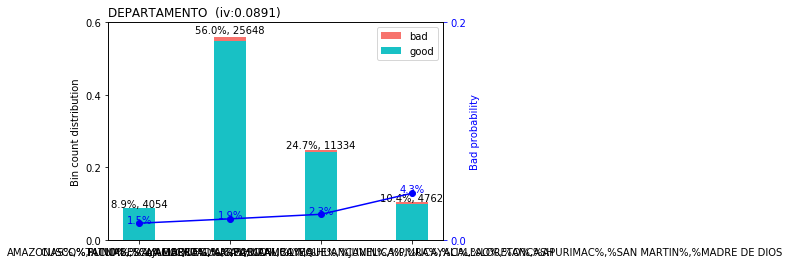

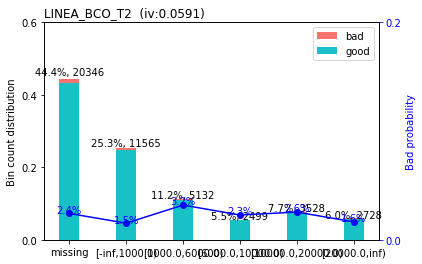

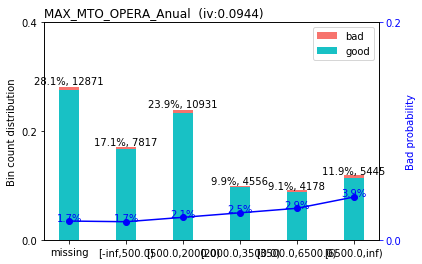

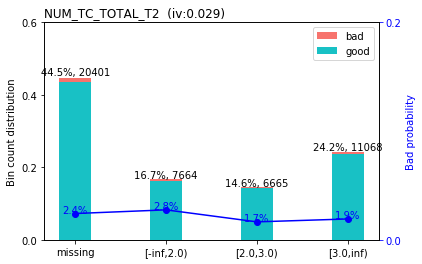

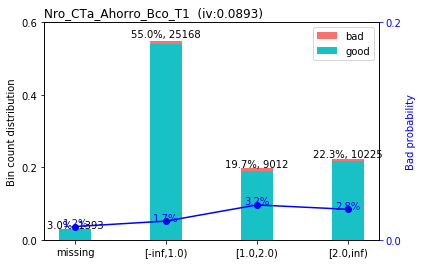

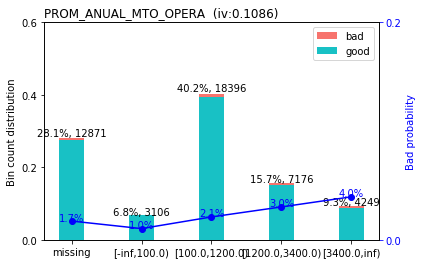

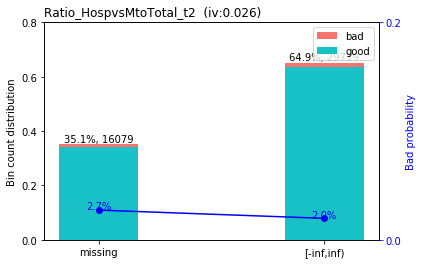

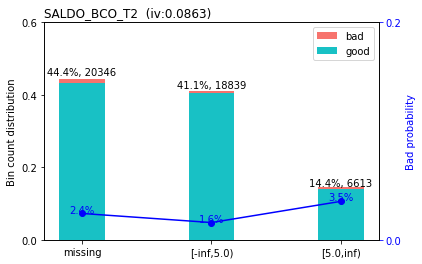

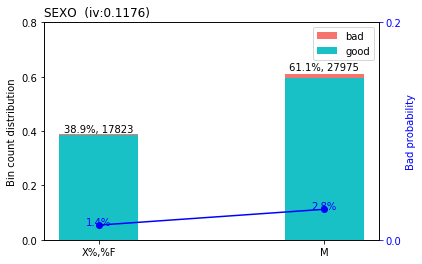

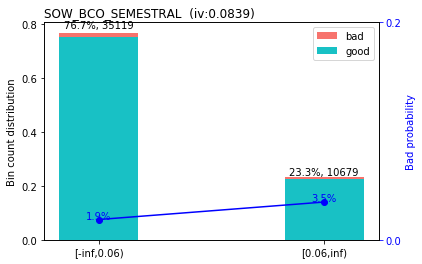

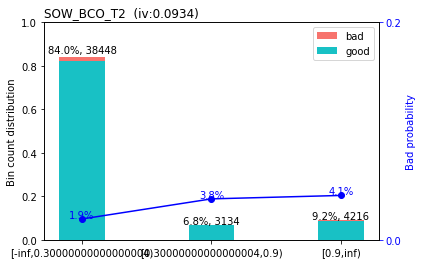

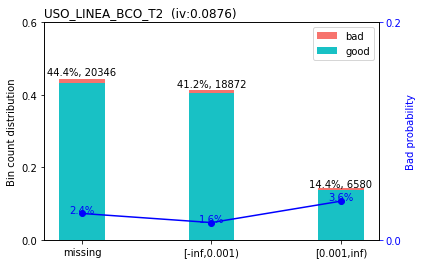

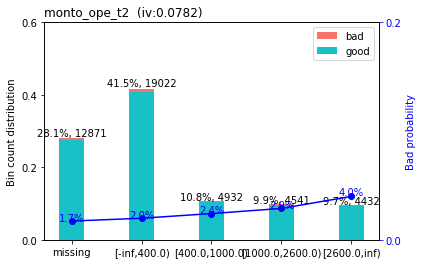

In [ ]:
sc.woebin_plot(bins)